Steps done in this Project :
      
*   Importing Necessary Packages

*   Loading the Algorithm

*   Definition of various algorithms

*   Image Prediction

Importing Libraries

In [ ]:
import os
import cv2
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import warnings
from PIL import Image
import io
from skimage.metrics import structural_similarity as ssim
warnings.filterwarnings('ignore')

Model Loading from Drive

In [ ]:
from keras.models import load_model

# Load the model from Google Drive
model_path = r"C:\Users\sg-model2.h5"
sgmodel = load_model(model_path)

# Load the model from Google Drive
model_path = r"C:\Users\ef-model1.h5"
efmodel = load_model(model_path)

Sigma Guard Algorithm

In [3]:
def calculate_standard_deviation(image, window_size=9, stride=1):
    height, width = image.shape
    std_dev_map = np.zeros((height, width))
    for y in range(0, height - window_size + 1, stride):
        for x in range(0, width - window_size + 1, stride):
            window = image[y:y + window_size, x:x + window_size]

            # Manual standard deviation calculation
            mean = np.mean(window)
            std_dev = np.sqrt(np.mean((window - mean) ** 2))

            std_dev_map[y:y + window_size, x:x + window_size] += std_dev

    iimg=255-std_dev_map     
    return iimg

EF Patrol Algorithm

In [4]:
def calculate_entropy(graydata):
  inverted_image = 255-graydata
  radius = 1
  epsilon = 1e-8
  padded_image = np.pad(inverted_image, pad_width=radius, mode='constant', constant_values=0)
  h, w = inverted_image.shape
  entropy_matrix = np.zeros((h, w), dtype=np.float64)
  l = [-1, 0, 1]
  for i in range(1, h + 1):
     for j in range(1, w + 1):
      local_sum = 0.0
      for p in l:
        for q in l:
          intensity = padded_image[i + p, j + q]
          if intensity > 0:
            local_sum += intensity * np.log(intensity + epsilon)

      entropy_matrix[i - 1, j - 1] = -local_sum
  return entropy_matrix

CSDE Algorithm

In [5]:
def update_image(I, Me, me, mg):
    H, W = I.shape

    for i in range(H):
        for j in range(W):
            if Me[i][j] < me:
                if I[i][j] < mg:
                    I[i][j] *= Me[i][j]
                else:
                    temp = I[i][j] * (1 + me - Me[i][j])
                    I[i][j] = min(1, temp)
            else:
                temp = I[i][j] * (1 + Me[i][j] - me)
                I[i][j] = min(1, temp)

    return I

Clear Crack Algorithm

In [6]:
def clearcrack(nd,ad,bindata):
  uimg=nd
  h,w=uimg.shape
  bimg=bindata
  image=ad
  for i in range(h):
      for j in range(w):
          if bimg[i][j]==0:
             uimg[i][j]=image[i][j]
  return uimg

Image Prediction with EF Patrol & Sigma Guard Algorithm

Image Prediction Starts....

Image 1 : 
EF Patrol Algorithm. SSIM : 0.75
Sigma Guard Algorithm. SSIM : 0.85
Sigma Guard Algorithm is better than EF Patrol Algorithm
1/1 [==============================] - 1s 624ms/step
Prediction by EF Patrol + CSDE Algorithm and S2Net Model
Non-Crack Image
Predicted class: [0]
Prediction by Sigma Guard + CSDE Algorithm and S2Net Model
Crack Image
Predicted class: [1]
*********************************************************************

Image 2 : 
EF Patrol Algorithm. SSIM : 0.86
Sigma Guard Algorithm. SSIM : 0.90
Sigma Guard Algorithm is better than EF Patrol Algorithm
1/1 [==============================] - 0s 66ms/step
Prediction by EF Patrol + CSDE Algorithm and S2Net Model
Crack Image
Predicted class: [1]
Prediction by Sigma Guard + CSDE Algorithm and S2Net Model
Crack Image
Predicted class: [1]
*********************************************************************

Image 3 : 
EF Patrol Algorithm. SSIM : 0.70
Sigma Guard Algorithm. SSIM : 0.63
EF_Pa

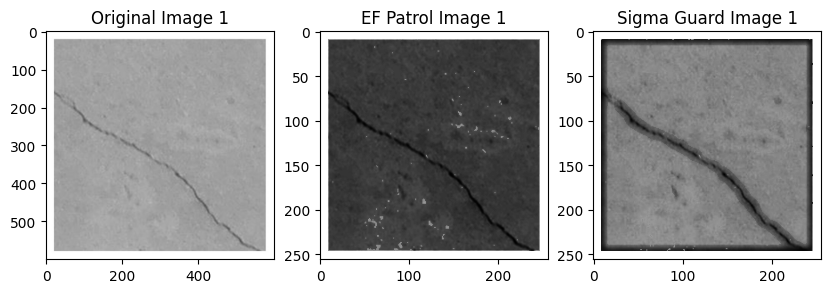

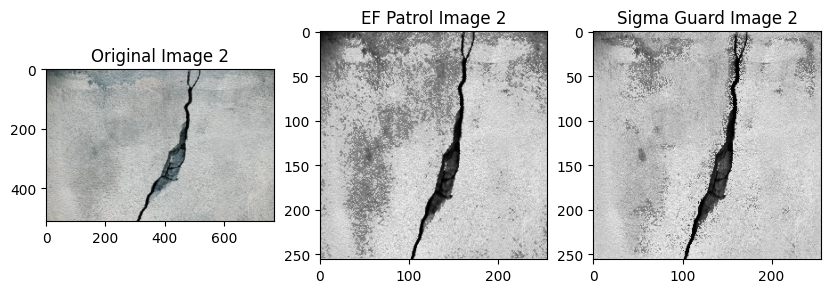

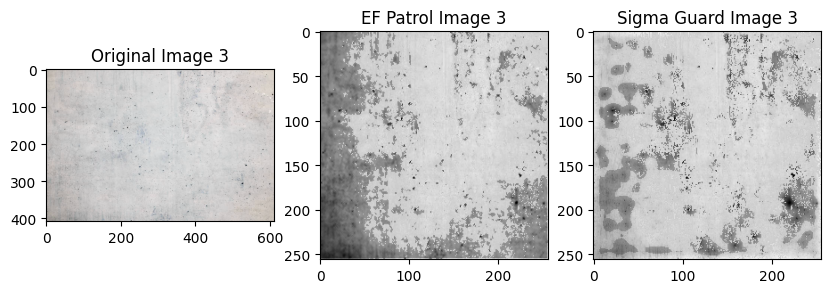

In [7]:
# Function to preprocess the image
def preprocess_image(image):
  resized_image = cv2.resize(image, (256, 256))
  grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
  min_val = np.min(grayscale_image)
  max_val = np.max(grayscale_image)
  normalized_gray_image = (grayscale_image - min_val) / (max_val - min_val)
  normalized_gray_image1 = copy.deepcopy(normalized_gray_image)
  normalized_gray_image2 = copy.deepcopy(normalized_gray_image)
  normalized_gray_image3 = copy.deepcopy(normalized_gray_image)
  normalized_gray_image4 = copy.deepcopy(normalized_gray_image)
  normalized_gray_image5 = copy.deepcopy(normalized_gray_image)
  mg=np.mean(normalized_gray_image)
  binary_image = np.where(normalized_gray_image >= mg, 1, 0)
  mg = np.mean(normalized_gray_image)
  SInverted_image = calculate_standard_deviation(grayscale_image)
  EInverted_image = calculate_entropy(grayscale_image)
  min_value = np.min(SInverted_image)
  max_value = np.max(SInverted_image)
  snormalized_result_map = (SInverted_image - min_value) / (max_value - min_value)
  sms = np.mean(snormalized_result_map)
  min_value = np.min(EInverted_image)
  max_value = np.max(EInverted_image)
  enormalized_result_map = (EInverted_image - min_value) / (max_value - min_value)
  ems = np.mean(enormalized_result_map)
  simg = update_image(normalized_gray_image1, snormalized_result_map, sms, mg)
  eimg = update_image(normalized_gray_image2, enormalized_result_map, ems, mg)
  supdatedimg=clearcrack(normalized_gray_image3,simg,binary_image)
  eupdatedimg=clearcrack(normalized_gray_image4,eimg,binary_image)
  sssim=ssim(normalized_gray_image5,supdatedimg, data_range=1)
  essim=ssim(normalized_gray_image5,eupdatedimg, data_range=1) 
  print(f"EF Patrol Algorithm. SSIM : {essim:.2f}")
  print(f"Sigma Guard Algorithm. SSIM : {sssim:.2f}")
  if sssim > essim:
     print("Sigma Guard Algorithm is better than EF Patrol Algorithm")
  else:
    print("EF_Patrol Algorithm is better than Sigma Gaurd Algorithm\n")
  return supdatedimg,eupdatedimg

# Function to perform prediction
def predict_image(image,number):
    s_image,e_image = preprocess_image(image)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image,cmap='grey')
    plt.title(f'Original Image {number}')
    plt.subplot(1, 3, 2)
    plt.imshow(e_image,cmap='grey')
    plt.title(f'EF Patrol Image {number}')
    plt.subplot(1, 3, 3)
    plt.imshow(s_image,cmap='grey')
    plt.title(f'Sigma Guard Image {number}')
    spredictions = sgmodel.predict(s_image.reshape(-1, 256, 256, 1))
    epredictions = efmodel.predict(s_image.reshape(-1, 256, 256, 1))
    # If you want to get the predicted class labels instead of probabilities, you can use argmax
    spredicted_class = np.argmax(spredictions, axis=1)
    epredicted_class = np.argmax(epredictions, axis=1)
    return spredicted_class,epredicted_class

file_path=r"C:\sample"
data=[]
for img in os.listdir(file_path):
    try:
        oimage = cv2.imread(os.path.join(file_path, img))
        if oimage is not None:
          data.append(oimage)
    except Exception as e:
        print(e)
        
print("Image Prediction Starts....")
for i,image in enumerate(data):
  print(f"\nImage {i+1} : ")
  # Perform prediction
  sprediction,eprediction = predict_image(image,i+1)
  # Assuming it's a binary classification, you might want to threshold the prediction
  print("Prediction by EF Patrol + CSDE Algorithm and S2Net Model")
  if eprediction == 0:
    print("Non-Crack Image")
  else:
    print("Crack Image")
  print("Predicted class:", eprediction)

  print("Prediction by Sigma Guard + CSDE Algorithm and S2Net Model")
  if sprediction == 0:
    print("Non-Crack Image")
  else:
    print("Crack Image")
  print("Predicted class:", sprediction)
  print("*********************************************************************")